# Bismillahirrahmanirrahiiim sukses aaamiiin

In [ ]:
# Numerical computing and provide dataframe to manipulating and analyze data
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Access data from drive
from google.colab import drive

# Sklearn Model
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score, r2_score

In [ ]:
# Load data from drive
drive.mount('/content/drive')
PATH_FILE = '/content/drive/My Drive/Project_Coba/Global_Economy_Indicators.csv'

Mounted at /content/drive


In [ ]:
# Read data
df = pd.read_csv(PATH_FILE)

# Show 5 first data
print(df.head())

# Summarize the data
df.info()

    CountryID        Country    Year    AMA exchange rate   \
0            4   Afghanistan     1970             0.044998   
1            4   Afghanistan     1971             0.044998   
2            4   Afghanistan     1972             0.044998   
3            4   Afghanistan     1973             0.044998   
4            4   Afghanistan     1974             0.044998   

    IMF based exchange rate    Population   Currency    Per capita GNI   \
0                   0.044998      10752971   Afghani                164   
1                   0.044998      11015857   Afghani                168   
2                   0.044998      11286753   Afghani                149   
3                   0.044998      11575305   Afghani                150   
4                   0.044998      11869879   Afghani                177   

    Agriculture, hunting, forestry, fishing (ISIC A-B)   \
0                                       8.699174e+08      
1                                       9.108281e+08      

In [ ]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 26 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   CountryID                                                                                 10512 non-null  int64  
 1   Country                                                                                   10512 non-null  object 
 2   Year                                                                                      10512 non-null  int64  
 3   AMA exchange rate                                                                         10512 non-null  float64
 4   IMF based exchange rate                                                                   10512 non-null  float64
 5   Population                                           

In [ ]:
col_to_remove_space = ['Country', 'Currency']
for i in col_to_remove_space:
   df[i] = df[i].str.strip()

# Show the countries listed
print(len(df['Country'].unique())) # There are 220 countries listed

220


In [ ]:
# sns.heatmap(df.corr(), annot=True, fmt=".1f")
# plt.show()
size_df = len(df)
print('Size of Original Data : {:d}'.format(size_df))
df = df.dropna()
print('Size After Removing Missing Value of Data : {:d}'.format(len(df)))

Size of Original Data : 10512
Size After Removing Missing Value of Data : 8519


In [ ]:
# Separate the feature and the label
y = df['Gross Domestic Product (GDP)']
X = df.drop(['Country', 'Year','Currency', 'CountryID','Gross Domestic Product (GDP)'], axis=1)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
print('Size of train data : {:d}'.format(len(X_train)))
print('Size of test data : {:d}'.format(len(X_test)))

Size of train data : 7667
Size of test data : 852


In [ ]:
# Define hyperparameters that will test
param_dist = {
    'n_estimators' : np.arange(300, 500, 100),
    'min_samples_leaf' : [1e-4, 1e-5, 1e-6],
    'min_samples_split' : [5, 7, 9],
    'max_depth' : [30, 40, 50],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [ ]:
# Instantiate RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
# Use RandomizedSearchCV untuk mencari hyperparametr optimal
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, scoring='neg_mean_squared_error', cv=5, random_state=42, n_jobs=-1)

In [ ]:
# Fit train data
random_search.fit(X_train, y_train)

In [ ]:
# The optimal hyperparameters
best_params = random_search.best_params_

In [ ]:
# Model with optimal hyperparameters
best_model = random_search.best_estimator_

In [ ]:
# model with optimal hyperprameters
best_model = RandomForestRegressor(max_depth=50, max_features='log2',
                      min_samples_leaf=0.0001, min_samples_split=5,
                      n_estimators=300)

In [ ]:
# Fit train data using best model
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, max_features='log2',
                      min_samples_leaf=0.0001, min_samples_split=5,
                      n_estimators=300)

In [ ]:
# Evaluate the model
y_pred = best_model.predict(X_test)
rmse = MSE(y_test, y_pred)**(0.5)
print('Mean Squared Error : ', rmse)

Mean Squared Error :  34111391217.36388


In [ ]:
# Evaluate the model with r2_squared metrics
r_squared = r2_score(y_test, y_pred)
print('R-squared : ',r_squared)

R-squared :  0.9991159510787303


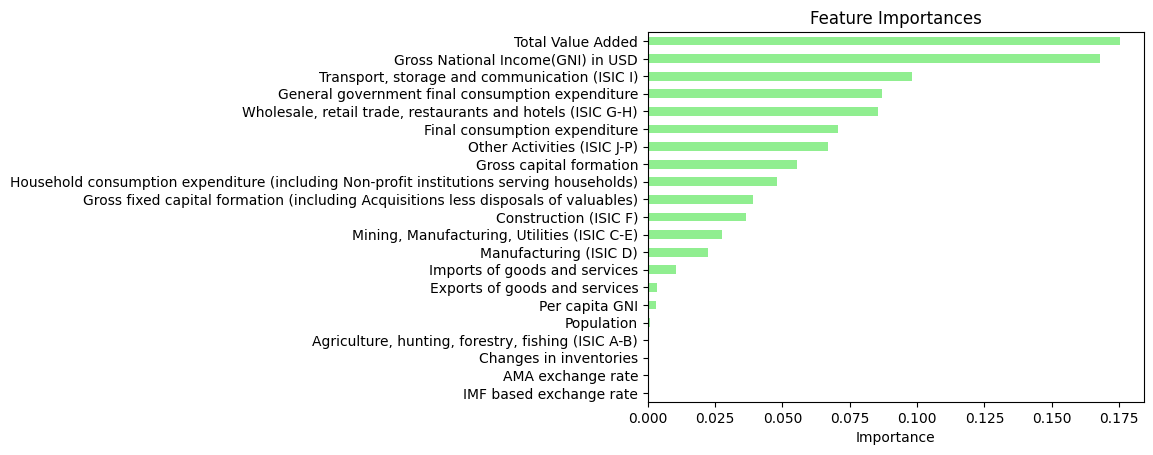

In [ ]:
# Create pd Series of importances
importance_rf = pd.Series(best_model.feature_importances_, index=X_train.columns)

# Sort importance_rf
sorted_importance_rf = importance_rf.sort_values()

# Create a horizontal bar plot
ax = sorted_importance_rf.plot(kind='barh', color='lightgreen')

# Set the plot title and labels
ax.set_title("Feature Importances")
ax.set_xlabel("Importance")

g = 0
g = g + 1
fig_name = "feature_importance_plot" + str(g) + ".png"
# Save the plot as an image file (e.g., PNG)
plt.savefig(fig_name, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
sorted_importance_rf

IMF based exchange rate                                                                     0.000120
AMA exchange rate                                                                           0.000239
Changes in inventories                                                                      0.000287
Agriculture, hunting, forestry, fishing (ISIC A-B)                                          0.000512
Population                                                                                  0.000877
Per capita GNI                                                                              0.003117
Exports of goods and services                                                               0.003315
Imports of goods and services                                                               0.010364
Manufacturing (ISIC D)                                                                      0.022439
Mining, Manufacturing, Utilities (ISIC C-E)                                                

## Exploratory Data Analysis (EDA)

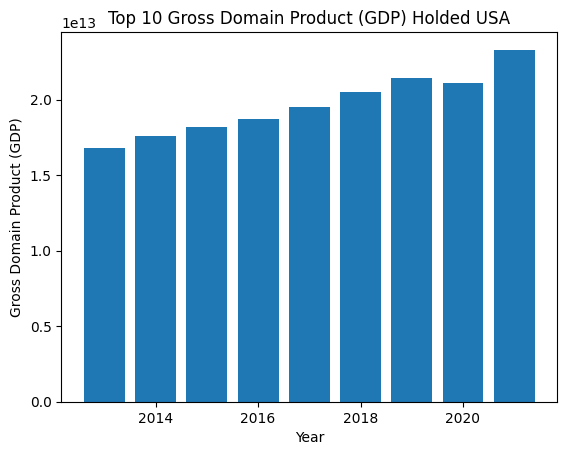

In [ ]:
# mencari negara yang memiliki gdp tertinggi
top_10_gdp = df.sort_values('Gross Domestic Product (GDP)', ascending=False).head(10)

# plot
fig, ax = plt.subplots()
ax.bar(top_10_gdp['Year'], top_10_gdp['Gross Domestic Product (GDP)'])
ax.set_xlabel('Year')
ax.set_ylabel('Gross Domain Product (GDP)')
ax.set_title('Top 10 Gross Domain Product (GDP) Holded USA')
plt.show()

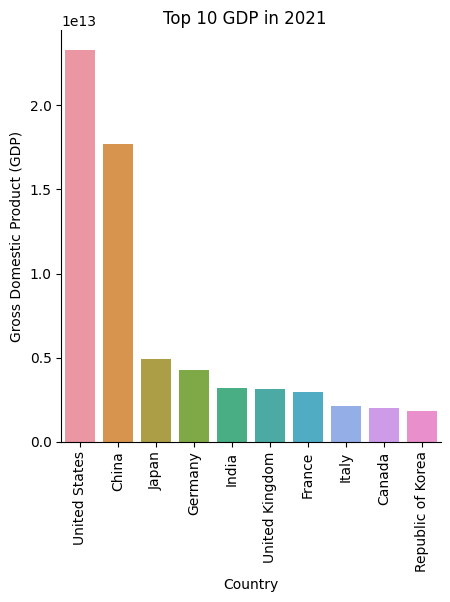

In [ ]:
# top 10 gdp in 2021
top_10_gdp_2021 = df[df['Year']==2021].sort_values('Gross Domestic Product (GDP)', ascending=False).head(10)
# top_10_gdp_2021

# using seaborn
sns.set_palette('Greys')
y = sns.catplot(data=top_10_gdp_2021, x='Country', y='Gross Domestic Product (GDP)', kind='bar')
y.fig.suptitle('Top 10 GDP in 2021')
plt.xticks(rotation=90)
plt.show()

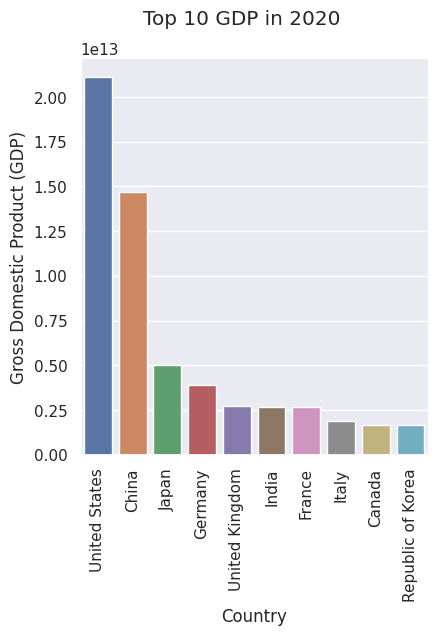

In [ ]:
# top 10 gdp in 2021
top_10_gdp_2020 = df[df['Year']==2020].sort_values('Gross Domestic Product (GDP)', ascending=False).head(10)
# top_10_gdp_2021

# using seaborn
sns.set()
# sns.set_context('poster')
g = sns.catplot(data=top_10_gdp_2020, x='Country', y='Gross Domestic Product (GDP)', kind='bar')
g.fig.suptitle('Top 10 GDP in 2020', y=1.03)
plt.xticks(rotation=90)
plt.show()

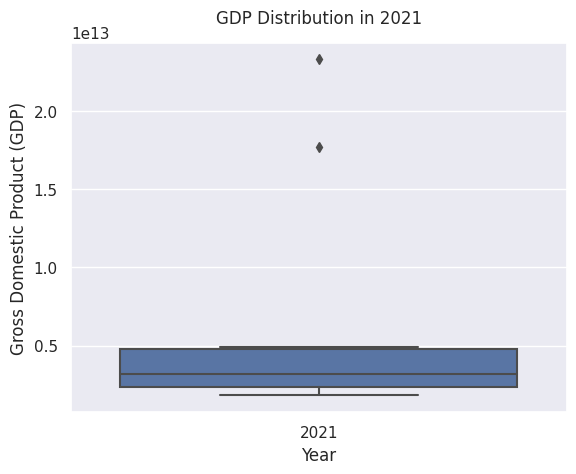

In [ ]:
# Show the GDP distribution
sns.set()
g = sns.boxplot(data=top_10_gdp_2021, x='Year', y='Gross Domestic Product (GDP)')
g.set_title('GDP Distribution in 2021', y=1.03)
plt.show()

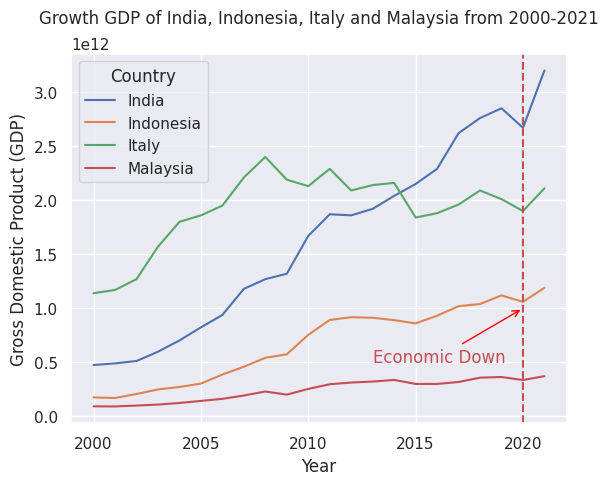

In [ ]:
# GDP Indonesia from 2000 until 2021
gdp_ind_id_ml_2000_2021 = df[(df['Year']>=2000) & (df['Country'].isin(['India', 'Indonesia', 'Malaysia', 'Italy']))]
# gdp_ind_2000_2021
fig, ax = plt.subplots()
ax = sns.lineplot(data=gdp_ind_id_ml_2000_2021, x='Year', y='Gross Domestic Product (GDP)', hue='Country')
ax.set_title('Growth GDP of India, Indonesia, Italy and Malaysia from 2000-2021', y=1.06)
ax.axvline(2020, color='r', linestyle='dashed')
ax.annotate('Economic Down', xy=(2020, 1e12), xytext=(2013, 0.5*1e12), color='r',
             arrowprops=dict(arrowstyle='->', color='red'))
# g.set_yscale('log')
plt.show()

In [ ]:
# dataframe for USA in 2021
df_usa_2021 = df[(df['Country']==' United States ') & (df['Year']==2021)]
df_coba = df_usa_2021.iloc[:, 8:]
df_coba = df_coba.iloc[:, :-1]
df_coba

,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,Construction (ISIC F),Exports of goods and services,Final consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation (including Acquisitions less disposals of valuables),Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD


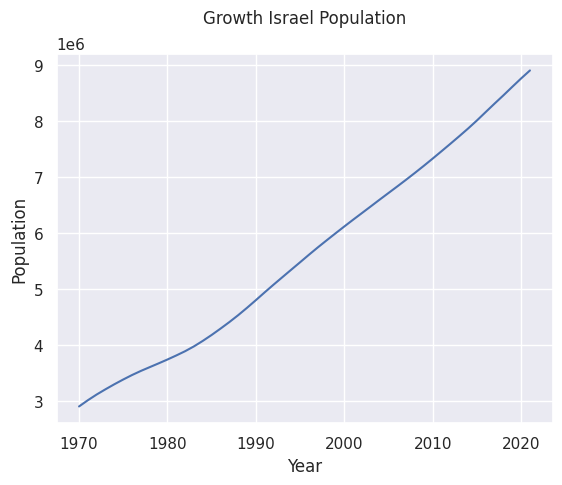

<Figure size 640x480 with 0 Axes>

In [ ]:
# Israel GDP Data
df_israel = df[df['Country']=='Israel']

# Growth population
g = sns.lineplot(data=df_israel, x='Year', y='Population')
g.set_title('Growth Israel Population', y=1.06)
plt.show()
plt.clf()

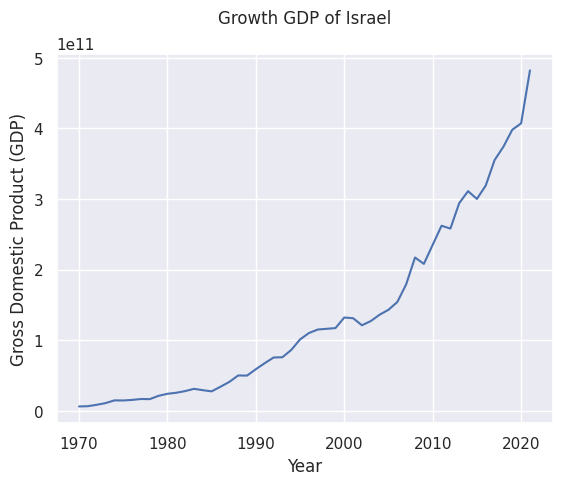

<Figure size 640x480 with 0 Axes>

In [ ]:
# Growth GDP
g = sns.lineplot(data=df_israel, x='Year', y='Gross Domestic Product (GDP)')
g.set_title('Growth GDP of Israel', y=1.06)
plt.show()
plt.clf()

In [ ]:
# df_coba_t = df_israel.T
# df_coba_t

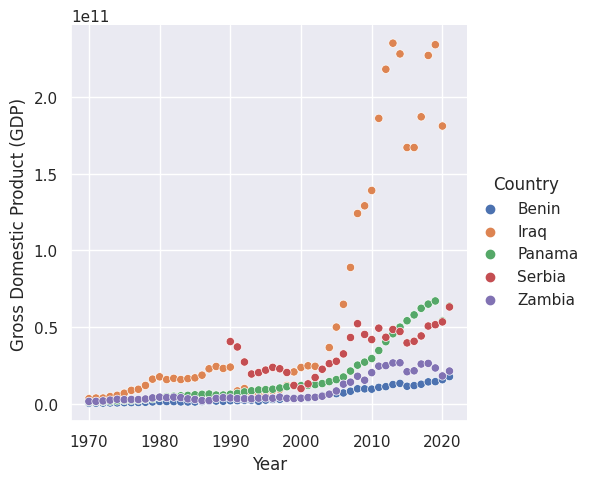

In [ ]:
# scatter  plot
country_sample = df['Country'].sample(5).to_list()
df_sample = df[df['Country'].isin(country_sample)]
sns.relplot(data=df_sample, x='Year', y='Gross Domestic Product (GDP)', kind='scatter', hue='Country')
plt.show()

In [ ]:
df.describe()

,CountryID,Year,AMA exchange rate,IMF based exchange rate,Population,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,Construction (ISIC F),Exports of goods and services,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
count,8519.000000,8519.000000,8.519000e+03,8.519000e+03,8.519000e+03,8519.000000,8.519000e+03,8.519000e+03,8.519000e+03,8.519000e+03,...,8.519000e+03,8.519000e+03,8.519000e+03,8.519000e+03,8.519000e+03,8.519000e+03,8.519000e+03,8.519000e+03,8.519000e+03,8.519000e+03
mean,430.084869,1996.672966,3.837866e+02,3.644537e+02,2.859996e+07,8943.837422,8.577601e+09,1.562281e+09,1.195824e+10,5.651583e+10,...,1.264716e+11,5.551048e+10,3.697208e+10,4.913698e+10,9.067465e+10,2.092353e+11,1.876044e+10,3.012459e+10,2.190971e+11,2.195100e+11
std,251.534203,14.753532,2.388580e+03,1.970205e+03,1.059392e+08,15454.597760,4.354661e+10,8.863714e+09,5.504712e+10,1.924263e+11,...,6.666699e+11,1.985482e+11,1.900219e+11,2.329199e+11,5.362298e+11,1.077954e+12,1.014802e+11,1.536289e+11,1.099516e+12,1.088764e+12
min,8.000000,1970.000000,4.300000e-14,4.300000e-14,7.635000e+03,34.000000,2.813900e+04,-1.510000e+11,2.267720e+05,1.685190e+06,...,7.030042e+06,4.803490e+06,-2.484990e+05,-2.581190e+06,2.480879e+06,6.867691e+06,-6.479048e+06,1.525961e+06,7.776335e+06,7.791209e+06
25%,208.000000,1984.000000,1.000000e+00,1.000000e+00,1.521692e+06,794.500000,2.303467e+08,4.329640e+05,1.140136e+08,7.356162e+08,...,1.628995e+09,9.968300e+08,2.436478e+08,4.329270e+08,6.472890e+08,2.441093e+09,1.579292e+08,3.401682e+08,2.514575e+09,2.588506e+09
50%,430.000000,1997.000000,3.478467e+00,3.388750e+00,6.266615e+06,2516.000000,1.216497e+09,6.997924e+07,5.965141e+08,3.822933e+09,...,7.712417e+09,4.495825e+09,1.496859e+09,2.644929e+09,3.214787e+09,1.138785e+10,8.842546e+08,1.619643e+09,1.183618e+10,1.225222e+10
75%,630.000000,2009.000000,7.449614e+01,6.918374e+01,2.050676e+07,9663.000000,4.838841e+09,6.924635e+08,4.214811e+09,2.312345e+10,...,4.100420e+10,2.302035e+10,1.111752e+10,1.911278e+10,2.114338e+10,6.833269e+10,5.724953e+09,9.421524e+09,6.982140e+10,7.244954e+10
max,894.000000,2021.000000,1.116366e+05,4.200000e+04,1.425893e+09,198294.000000,1.350000e+12,2.110000e+11,1.240000e+12,3.530000e+12,...,1.590000e+13,3.400000e+12,4.870000e+12,5.780000e+12,1.290000e+13,2.330000e+13,2.490000e+12,3.520000e+12,2.360000e+13,2.330000e+13


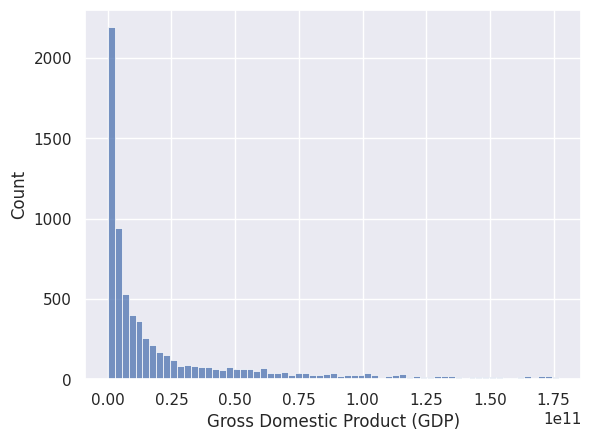

In [ ]:
# data without outliers
df_q1 = df['Gross Domestic Product (GDP)'].quantile(0.25)
df_q3 = df['Gross Domestic Product (GDP)'].quantile(0.75)
df_iqr = df_q3 - df_q1
df_lower = df_q1 - 1.5*df_iqr
df_upper = df_q3 + 1.5*df_iqr
data_without_outliers = df[(df['Gross Domestic Product (GDP)']>df_lower) & (df['Gross Domestic Product (GDP)']<df_upper)]
# data_without_outliers

# data without outliers
# df_with_outliers = df[~]
sns.histplot(data=data_without_outliers, x='Gross Domestic Product (GDP)')
plt.show()

In [ ]:
l = [1,2,3,4,5]
coba = df.sample(n=2)
coba

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
6292,508,Mozambique,2005,23.060965,23.060965,20211114,Metical,405,1.944813e+09,880218019.0,...,6.390355e+09,3.545594e+09,1.149426e+09,1.436695e+09,2.111475e+09,7.581984e+09,1.033255e+09,9.384310e+08,8.195354e+09,8.542083e+09
3848,324,Guinea,2021,9795.705833,9795.705833,13531906,Guinea Franc,1046,4.070368e+09,-313701670.0,...,9.426698e+09,8.387189e+09,1.495875e+09,4.156479e+09,2.465496e+09,1.446996e+10,6.872769e+08,2.758664e+09,1.415432e+10,1.603611e+10


In [ ]:
l = [1,2,3,4,5]
coba1 = df.sample(n=2, random_state=2)
coba1

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
10273,860,Uzbekistan,2014,2310.948159,2310.948159,30446542,Uzbekistan Sum,2752,2.319966e+10,4.667866e+09,...,5.118965e+10,1.642344e+10,1.025795e+10,1.390628e+10,1.933203e+10,7.372018e+10,7.357936e+09,5.987260e+09,8.378219e+10,8.084539e+10
721,52,Barbados,2003,2.000000,2.000000,267499,Barbados Dollar,11871,6.350000e+07,-2.900348e+06,...,2.049637e+09,1.512750e+09,2.596500e+08,3.573000e+08,1.297131e+09,2.902712e+09,2.603182e+08,7.770447e+08,3.175535e+09,3.306959e+09


## 10 Negara dengan penghasil agriculture tertinggi pada tahun 2021

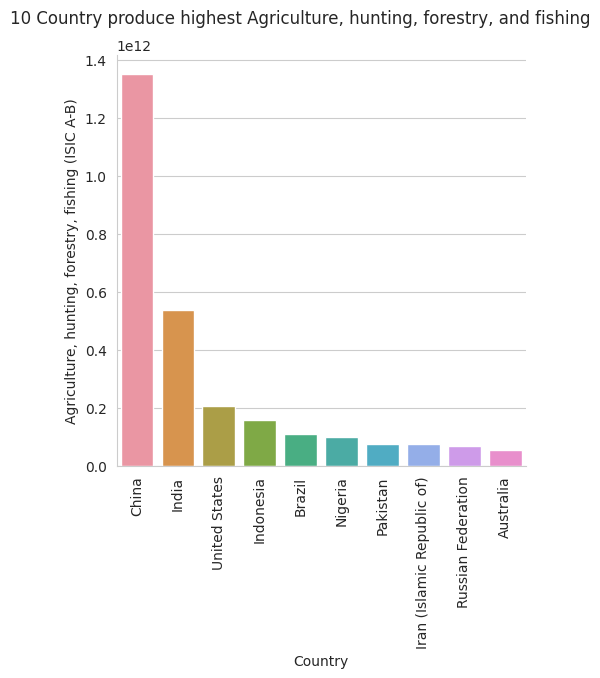

<Figure size 640x480 with 0 Axes>

In [ ]:
# data negara pada tahun 2021
df_2021 = df[df['Year']==2021]
df_agri_top_10 = df_2021.sort_values('Agriculture, hunting, forestry, fishing (ISIC A-B)', ascending=False).head(10)

# plot data
sns.set_style('whitegrid')
sns.set_palette('icefire')
g = sns.catplot(data=df_agri_top_10, x='Country', y='Agriculture, hunting, forestry, fishing (ISIC A-B)', kind='bar')
g.fig.suptitle('10 Country produce highest Agriculture, hunting, forestry, and fishing', y=1.03)
plt.xticks(rotation=90)
plt.show()
plt.clf()

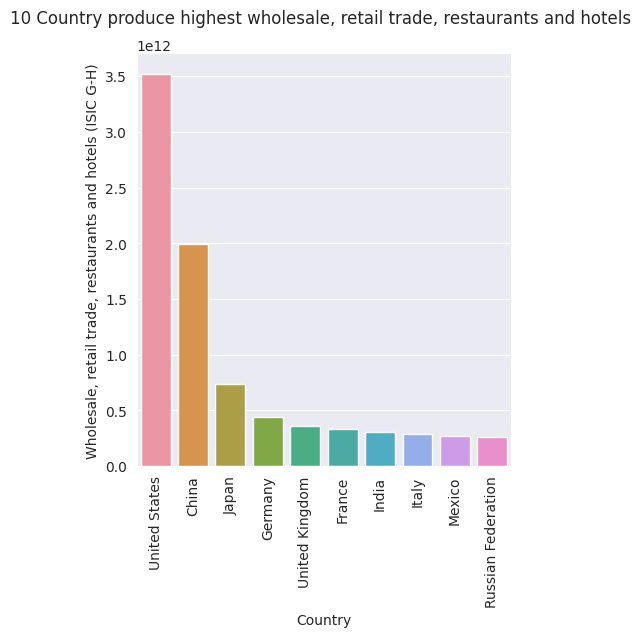

<Figure size 640x480 with 0 Axes>

In [ ]:
# data negara pada tahun 2021
df_hotel_top_10 = df_2021.sort_values('Wholesale, retail trade, restaurants and hotels (ISIC G-H)', ascending=False).head(10)

# plot data
sns.set_style('darkgrid')
sns.set_palette('RdBu')
g = sns.catplot(data=df_hotel_top_10, x='Country', y='Wholesale, retail trade, restaurants and hotels (ISIC G-H)', kind='bar')
g.fig.suptitle('10 Country produce highest wholesale, retail trade, restaurants and hotels', y=1.03)
plt.xticks(rotation=90)
plt.show()
plt.clf()

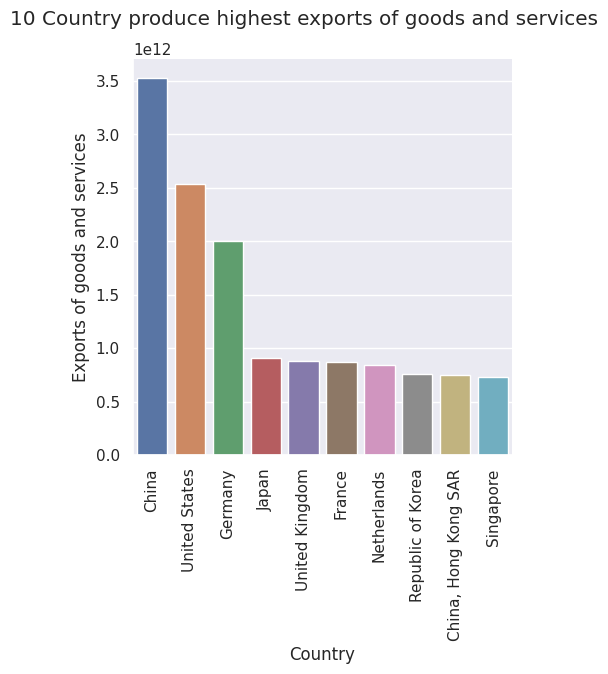

<Figure size 640x480 with 0 Axes>

In [ ]:
# Exports of goods and services
# data negara pada tahun 2021
df_export_top_10 = df_2021.sort_values('Exports of goods and services', ascending=False).head(10)

# plot data
sns.set()
g = sns.catplot(data=df_export_top_10, x='Country', y='Exports of goods and services', kind='bar')
g.fig.suptitle('10 Country produce highest exports of goods and services', y=1.03)
plt.xticks(rotation=90)
plt.show()
plt.clf()

## Applying PCA

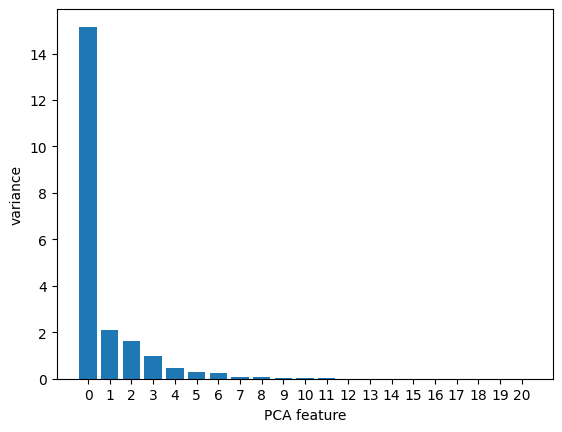

<Figure size 640x480 with 0 Axes>

In [ ]:
# import utility function
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# create scaler : scaler
scaler = StandardScaler()

# define PCA
pca = PCA()

# fit samples using PCA
pipeline = make_pipeline(scaler, pca)

# fit the pipeline
pipeline.fit(X_train)

# plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()
plt.clf()

In [ ]:
X_train.shape

(7667, 21)